# 📖 TABLE OF CONTENTS

- [1. Installing the required libraries]()
- [2. Emotion Classifier Taipy App for Prediction on User Images]()
- [3. Deployment of Emotion Classifier Taipy App on Render Platform]()
  - [1. Steps for Deployment on Render Platform]()
  - [2. Emotion Classifier Taipy App Python code]()
  - [3. Requirements file]()
  - [4. Storing Emotion Classifier Model in Git LFS]()
  - [5. Failed Render Deployment]()
- [4. Emotion Classifier Gradio App for Prediction on User Images]()
- [5. Deployment of the Emotion Classifier Gradio App on Hugging Face Spaces]()
- [6. Deployment for Real-time Prediction on Webcam Video]()
- [7. Model Retraining]()
  - [1. Need for Model Retraining]()
  - [2. When to do Model Retraining ?]()
  - [3. How to do Model Retraining ?]()
  - [4. A/B Testing]()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Installing the required libraries

In [ ]:
!pip3 install tensorflow keras numpy matplotlib opencv-python

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Emotion Classifier Taipy App for Prediction on User Images

In [ ]:
!pip3 install --ignore-installed taipy taipy-gui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 41.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 35.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133

In [ ]:
# Imports
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from taipy.gui import Gui, notify

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
# Upload the best ResNet50 model
model_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/ResNet50_Transfer_Learning_40_Epochs.keras"
model = tf.keras.models.load_model(model_path)

In [ ]:
# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [ ]:
# Initialize the face classifier
face_classifier_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/haarcascade_frontalface_default.xml"
face_classifier = cv2.CascadeClassifier(face_classifier_path)

In [ ]:
# Function to test Emotion Classifier on local images before deployment using Taipy GUI
def predict_emotion_from_path(image_path):
    """
    Predicts the emotion given the path to an image.

    Args:
        image_path (str): The path to the image file.

    Returns:
        List of tuples: Each tuple contains the coordinates of the face (x, y, w, h) and the predicted emotion.
    """
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")

    # Detect faces in the image
    faces = face_classifier.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
    emotions = []
    for (x, y, w, h) in faces:
        face = image[y:y + h, x:x + w]
        face = cv2.resize(face, (224, 224))
        face = face.astype("float") / 255.0
        face = img_to_array(face)
        face = np.expand_dims(face, axis=0)

        prediction = model.predict(face)[0]
        emotion = emotion_labels[np.argmax(prediction)]
        emotions.append((x, y, w, h, emotion))
    return emotions, image

In [ ]:
import matplotlib.pyplot as plt

def display_image_with_emotions(image_path):
    emotions, image = predict_emotion_from_path(image_path)

    for (x, y, w, h, emotion) in emotions:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

1/1 [==============================] - 0s 322ms/step


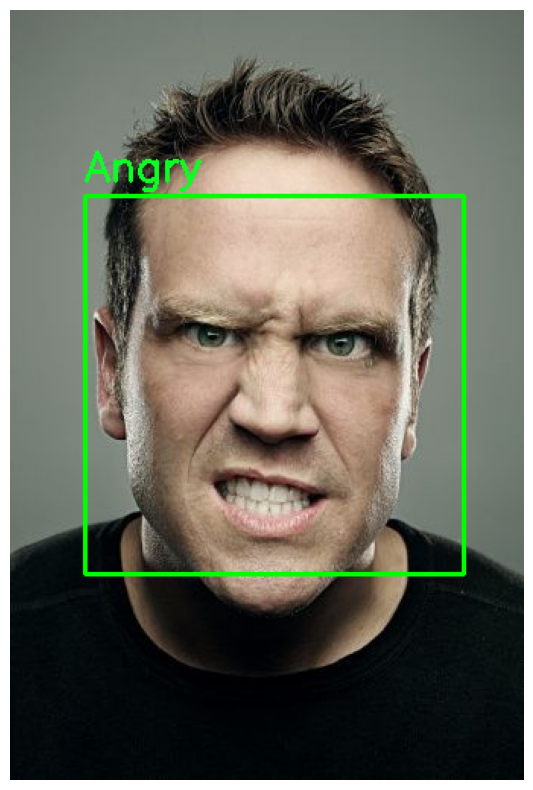

In [ ]:
# Test "Angry" expression image
angry_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/angry.jpg"
display_image_with_emotions(angry_image_path)

1/1 [==============================] - 0s 183ms/step


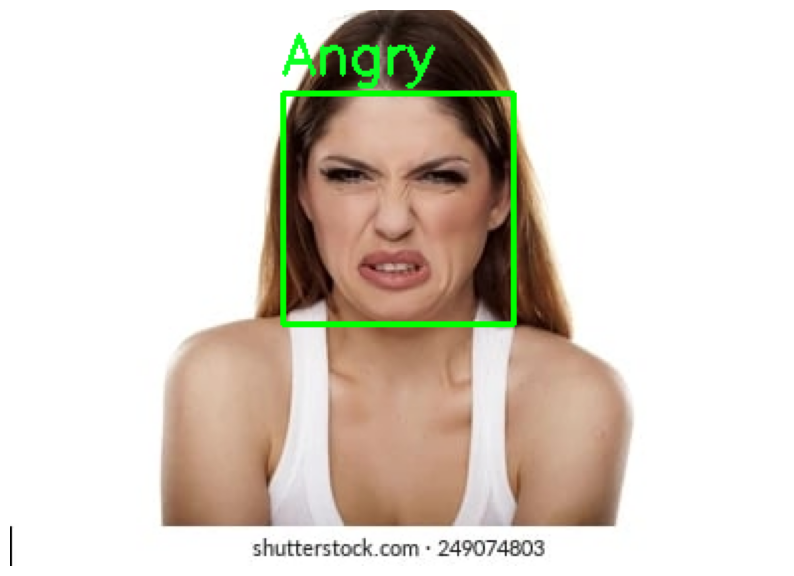

In [ ]:
# Test "Disgust" expression image
disgust_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/disgust.jpg"
display_image_with_emotions(disgust_image_path)

1/1 [==============================] - 0s 185ms/step


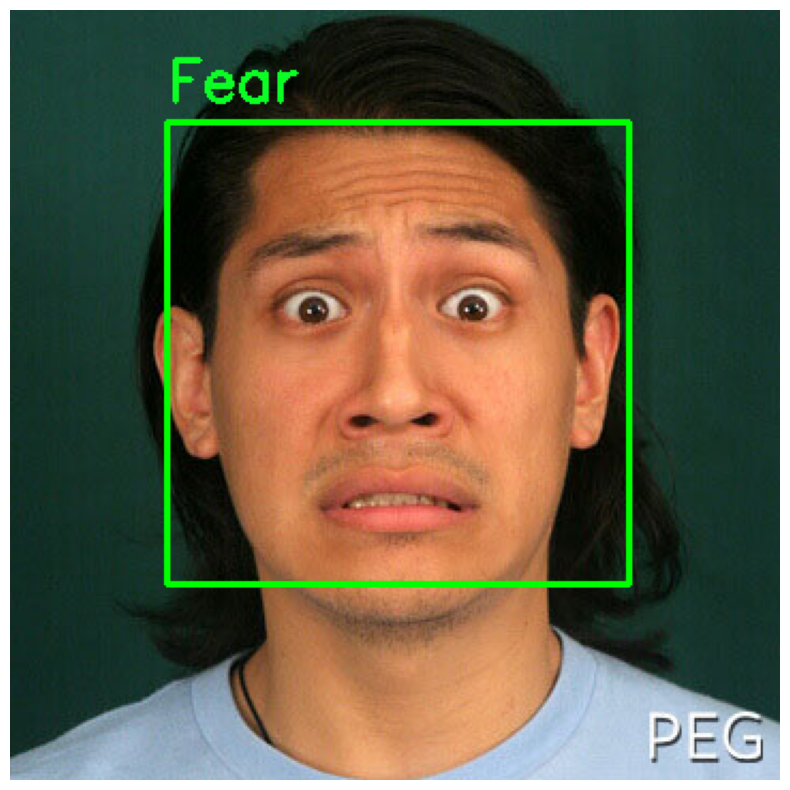

In [ ]:
# Test "Fear" expression image
fear_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/fear.jpg"
display_image_with_emotions(fear_image_path)

1/1 [==============================] - 0s 191ms/step


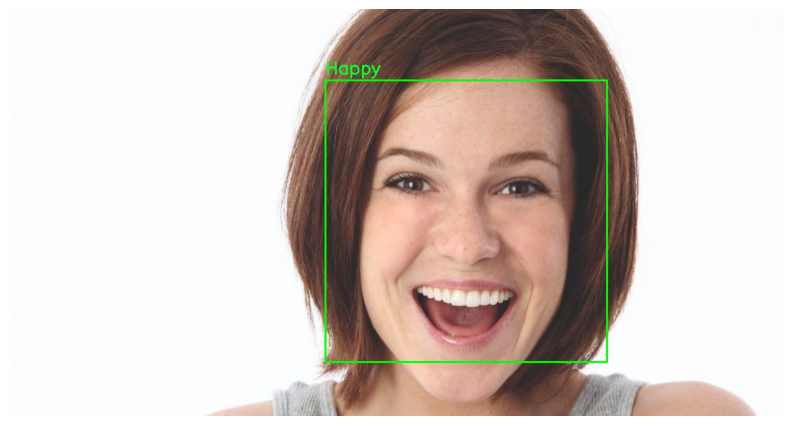

In [ ]:
# Test "Happy" expression image
happy_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/happy.jpg"
display_image_with_emotions(happy_image_path)

1/1 [==============================] - 0s 298ms/step


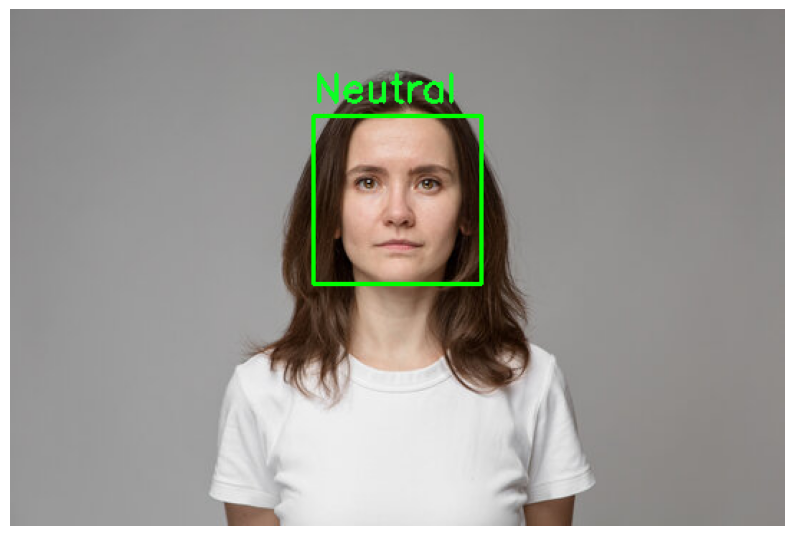

In [ ]:
# Test "Neutral" expression image
neutral_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/neutral.jpg"
display_image_with_emotions(neutral_image_path)

1/1 [==============================] - 0s 186ms/step


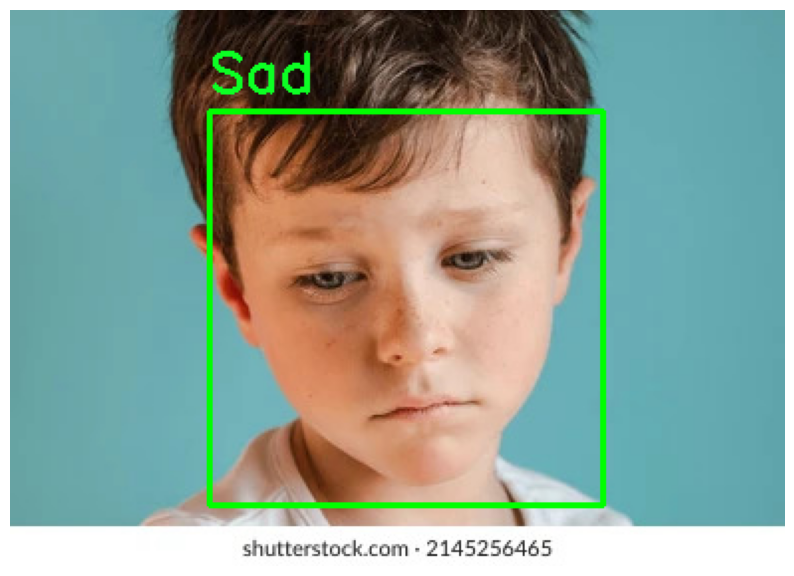

In [ ]:
# Test "Sad" expression image
sad_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/sad.jpg"
display_image_with_emotions(sad_image_path)

1/1 [==============================] - 0s 191ms/step


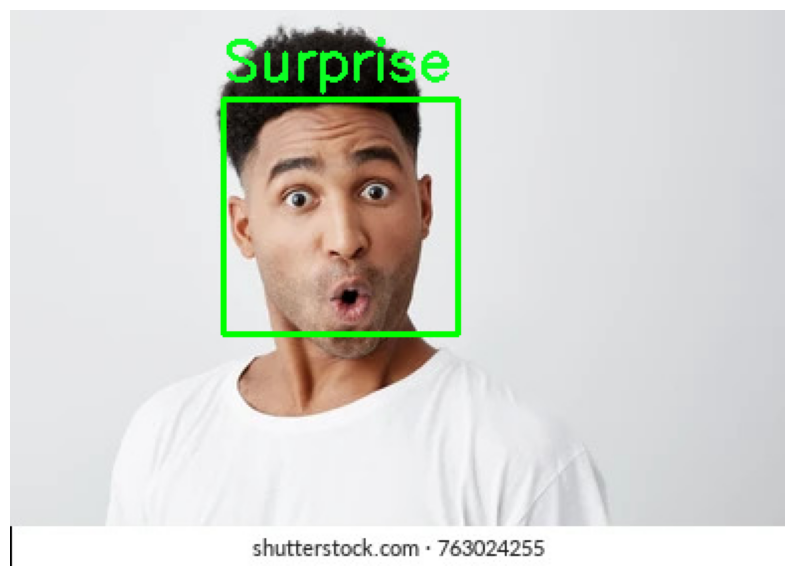

In [ ]:
# Test "Surprise" expression image
surprise_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/surprise.jpg"
display_image_with_emotions(surprise_image_path)

In [ ]:
# Function to predict emotion (to be used in actual Taipy App)
def predict_emotion(image):
    faces = face_classifier.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
    emotions = []
    for (x, y, w, h) in faces:
        face = image[y:y + h, x:x + w]
        face = cv2.resize(face, (224, 224))
        face = face.astype("float") / 255.0
        face = img_to_array(face)
        face = np.expand_dims(face, axis=0)

        prediction = model.predict(face)[0]
        emotion = emotion_labels[np.argmax(prediction)]
        emotions.append((x, y, w, h, emotion))
    return emotions

In [ ]:
def analyze_image(state):
    if state.image_file:
        nparr = np.frombuffer(state.image_file, np.uint8)
        image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        state.image = image
        state.emotions = predict_emotion(image)
        notify(state, 'image_source', 'render_image')

In [ ]:
def render_image(state):
    if state.image is not None:
        image = state.image.copy()
        for (x, y, w, h, emotion) in state.emotions:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
        _, img_encoded = cv2.imencode('.jpg', image)
        return img_encoded.tobytes()
    return None

In [ ]:
# Define GUI content
image_content = """
# Emotion Classifier

<|layout|columns=1 1|gap=10px|
<|
<|label|Image Upload|>
<|file|value=image_file|on_change=analyze_image|accept=image/*|label=Upload Image|>

|>
<|
<|image|source=image_source|width=600px|>
|>
|>

"""

In [ ]:
# Initialize GUI
state = {
    'image_file': None,
    'image': None,
    'emotions': []
}

gui = Gui(page=image_content)
gui.run(state=state, title="Emotion Classifier App", host="0.0.0.0", port=5000, image_source=render_image)

[2024-06-29 10:54:25][Taipy][INFO] Running in 'single_client' mode in notebook environment


INFO:Taipy:Running in 'single_client' mode in notebook environment


[2024-06-29 10:54:25][Taipy][INFO] Gui server has been stopped.


INFO:Taipy:Gui server has been stopped.


[2024-06-29 10:54:25][Taipy][INFO]  * Server starting on http://localhost:5000


INFO:Taipy: * Server starting on http://localhost:5000
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Deployment of Emotion Classifier Taipy App on Render Platform

## 1. Steps for Deployment on Render Platform

Here's a detailed breakdown of deploying the Emotion Classifier Taipy App on Render Platform:

**Prerequisites:**

- A Render account (free tier available) - https://render.com/
- Emotion Classifier Taipy App Python code
- Dependencies listed in a `requirements.txt` file

**Choosing a Packaging Method:**

There are two main ways to package your Taipy app for deployment on Render:

1. **Zip Deployment (Simpler but might not be ideal for large dependencies):**

    - Create a zip file containing:
        - Emotion Classifier Taipy App Python code
        - The `requirements.txt` file listing all dependencies
2. **Virtual Environment Deployment (Recommended for better dependency isolation):**

    - Create a virtual environment using tools like `venv` or `virtualenv`.
    - Install all the dependencies (including Taipy) within this virtual environment.
    - Zip the entire virtual environment directory along with Taipy App Python code.

**Creating a Web Service on Render:**

1. Login to your Render account and navigate to the "**Web Services**" section.
2. Click on "**New**" and select "**Web Service**".
3. Choose a name for your web service (e.g., "Emotion-Classifier-App").
4. Select "**Python**" as the runtime.
5. Under "**Build**", choose "**Dockerfile**" (Render will handle building the Docker image for you).

**Deployment:**

1. In the "**Deploy**" tab, select the deployment method based on your packaging choice:
    - **Zip Deployment:** Choose "**Zip**" and upload the zip file containing the app code and `requirements.txt`.
    - **Virtual Environment Deployment:** Choose "**Directory**" and upload the zipped virtual environment directory.
2. Render will automatically:
    - Build a Docker image containing the app and its dependencies.
    - Deploy the app to a containerized environment.
3. Once the deployment is successful, you'll see a green checkmark and details like allocated resources and a public URL.

**Accessing the App:**

The public URL provided by Render allows you to access the deployed Taipy app online. Anyone with the URL can use the app to upload images and get emotion predictions.

**Additional Notes:**

- **Environment Variables:**  If the app code uses any environment variables (like API keys), you can set them in Render's environment variable settings.

- **Scaling:**  Render allows you to scale the app based on traffic. You can adjust resource allocation (CPU, memory) as needed.

- **`requirements.txt`:**  This file is crucial for both deployment methods. It lists all the Python packages your app requires to run.

## 2. Emotion Classifier Taipy App Python code

Our Emotion Classifier Taipy App Python code `run_emotion_classifier_on_images.py` is given below:

In [ ]:
!cat run_emotion_classifier_on_images.py

#!/usr/bin/env python3

# Emotion Classifier Taipy App - Run Emotion Classifier on user uploaded images & get predictions

# Imports
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from taipy.gui import Gui, notify

# Load your pre-trained model
model = tf.keras.models.load_model("ResNet50_Transfer_Learning_40_Epochs.keras")

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Initialize the face classifier
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


# Function to predict emotion
def predict_emotion(image):
    faces = face_classifier.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
    emotions = []
    for (x, y, w, h) in faces:
        face = image[y:y + h, x:x + w]
        face = cv2.resize(face, (224, 224))
        face = face.astype("float") / 255.0
        face = im

## 3. Requirements file

Our requirements file `requirements.txt` is given below:

In [ ]:
!cat requirements.txt

tensorflow
keras
numpy
matplotlib
opencv-python
taipy
taipy-gui


## 4. Storing Emotion Classifier Model in Git LFS

Our Emotion Classifier model (ResNet50_Transfer_Learning_40_Epochs.keras) has a size of 303 MB. The maximum individual file size for GitHub repositories is 100 MB. This means any single file larger than 100 MB cannot be uploaded directly to a GitHub repository. Hence our model cannot be uploaded directly to GitHub repo.

Hence, the model is stored in Git LFS (Large File Storage). Git LFS is an open-source extension for Git that helps manage large files within your version control system. Here's what happens when you use Git LFS for your model:

**Stored in GitHub Repo:**

- **Pointer File:** Git LFS won't store the actual model file itself in the GitHub repository. Instead, it creates a small pointer file (usually a few bytes) containing information about the model file. This includes:
    - **Git LFS pointer:** This acts as a reference or address for the actual model file location.
    - **Hash:** A unique identifier for the model file version.

**Git LFS Storage:**

- **Remote Storage:** The actual 303 MB model file is stored on a separate server managed by Git LFS or your Git hosting provider (like GitHub). This frees up space in your Git repository and keeps it manageable.

**Key Points:**

- You'll need to configure Git LFS on your local machine and in your Git repository on GitHub. Refer to the official Git LFS documentation https://git-lfs.com/ for detailed instructions.
- Git LFS seamlessly integrates with your Git workflow. You can commit, push, and pull changes to your model file just like any other file, but Git LFS handles the storage and retrieval behind the scenes.
- When you clone the repository, Git LFS automatically downloads the model file from the remote storage based on the information in the pointer file.

By using Git LFS, you can effectively track and manage your large model file within your Git repository on GitHub without exceeding file size limitations.

## 5. Failed Render Deployment



Render Platform assumes that Emotion Classifier model is present in the GitHub repo. Since model is actually in Git LFS, deployment in Render failed.

The screenshots of failed Render Deployment are shown below:

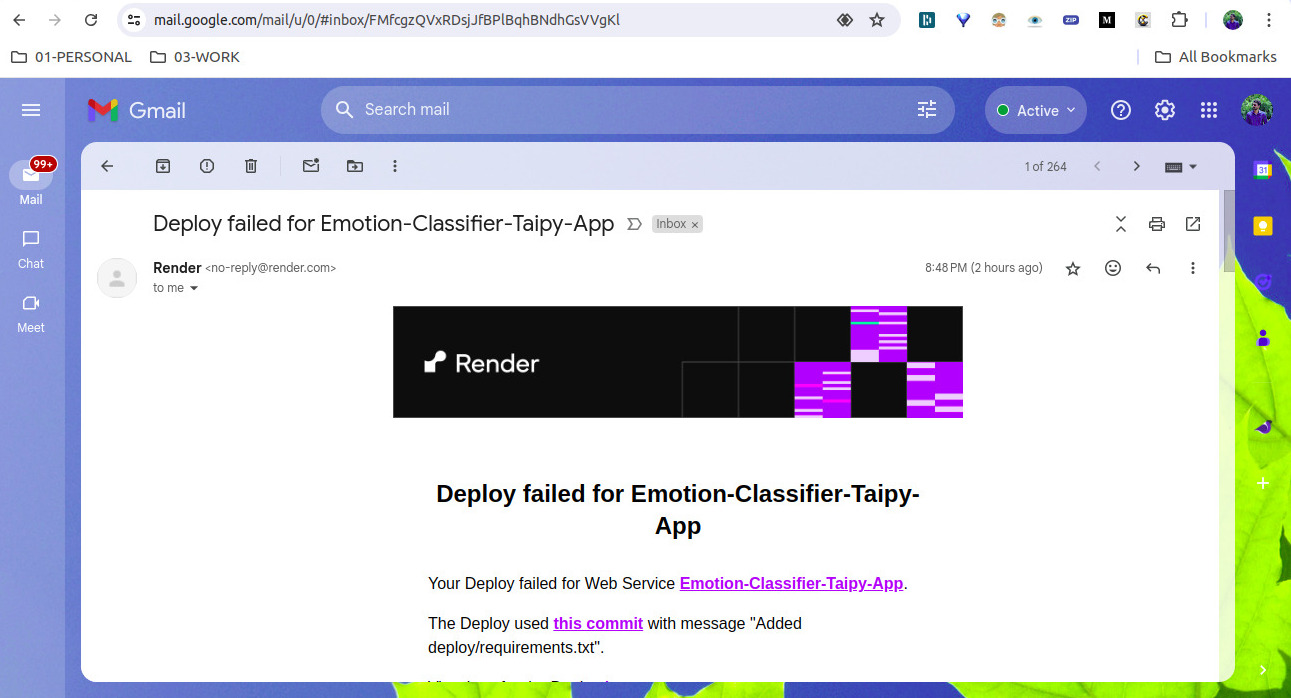

In [ ]:
# Failed Render Deployment

from IPython import display
display.Image("data/images/CV_Project_01_Emotion_Classifier_Keras-04-Render-Failed-Deployment-01.jpg")

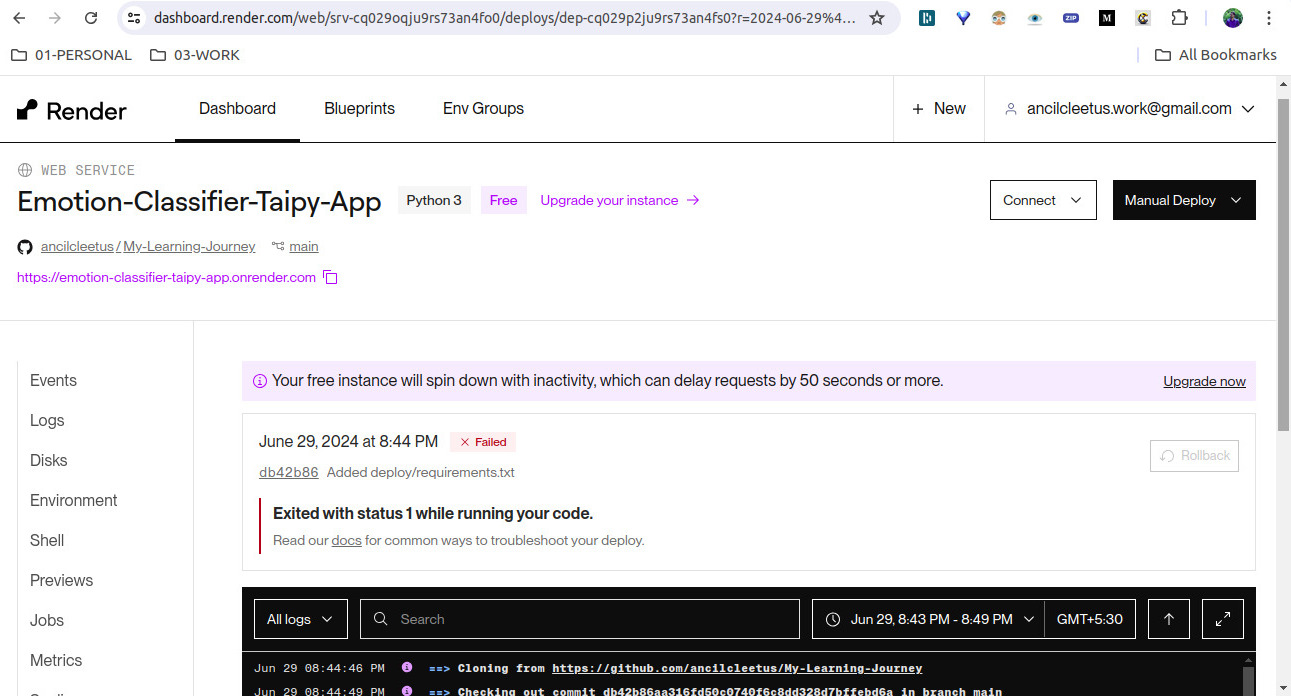

In [ ]:
# Failed Render Deployment

from IPython import display
display.Image("data/images/CV_Project_01_Emotion_Classifier_Keras-04-Render-Failed-Deployment-02.jpg")

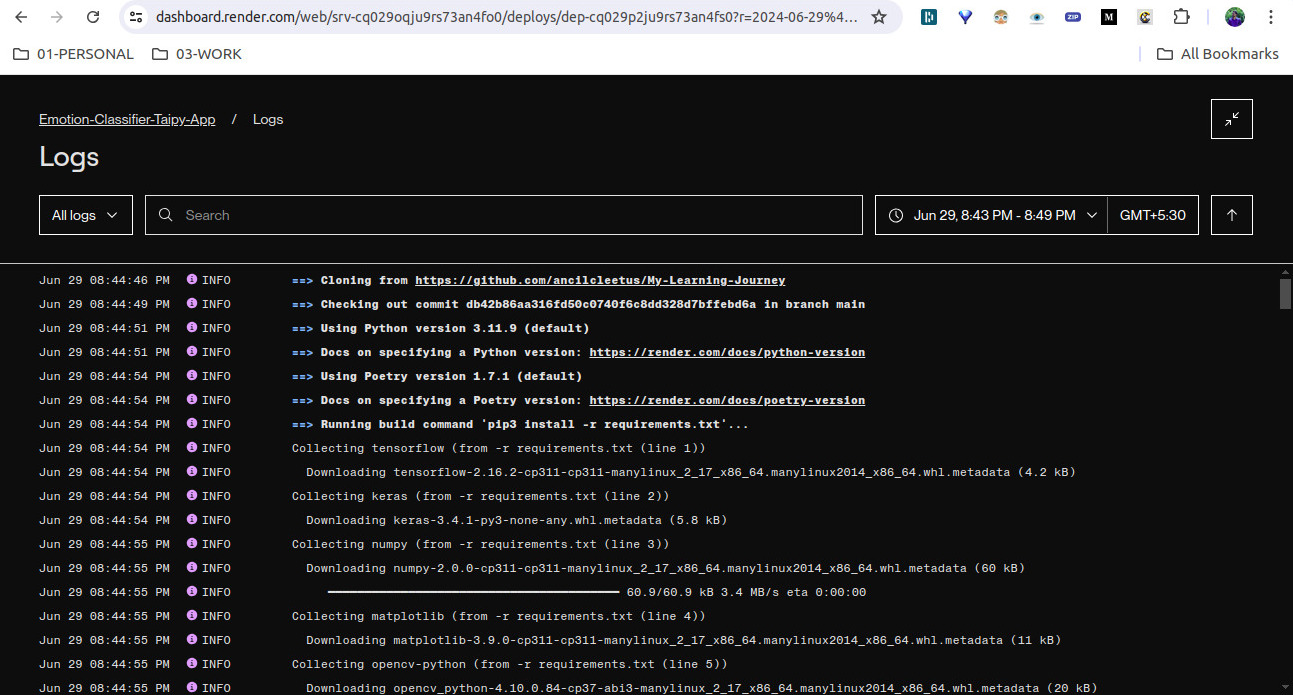

In [ ]:
# Failed Render Deployment

from IPython import display
display.Image("data/images/CV_Project_01_Emotion_Classifier_Keras-04-Render-Failed-Deployment-03.jpg")

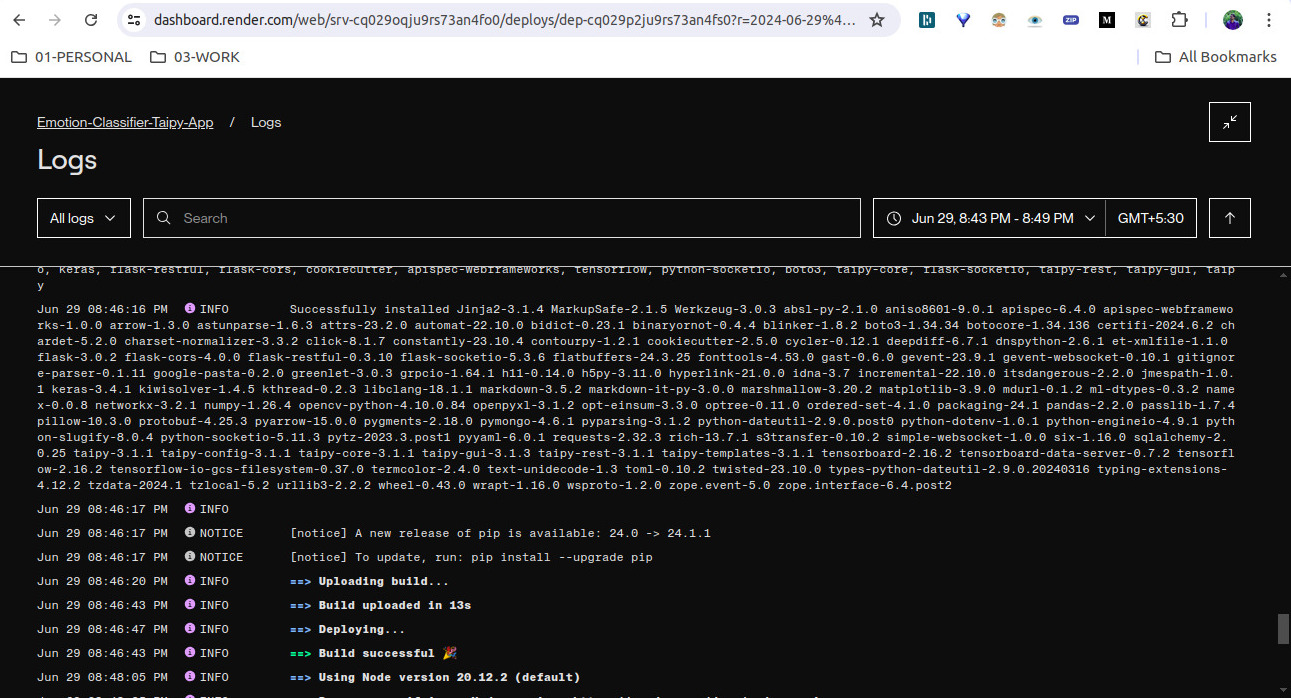

In [ ]:
# Failed Render Deployment

from IPython import display
display.Image("data/images/CV_Project_01_Emotion_Classifier_Keras-04-Render-Failed-Deployment-04.jpg")

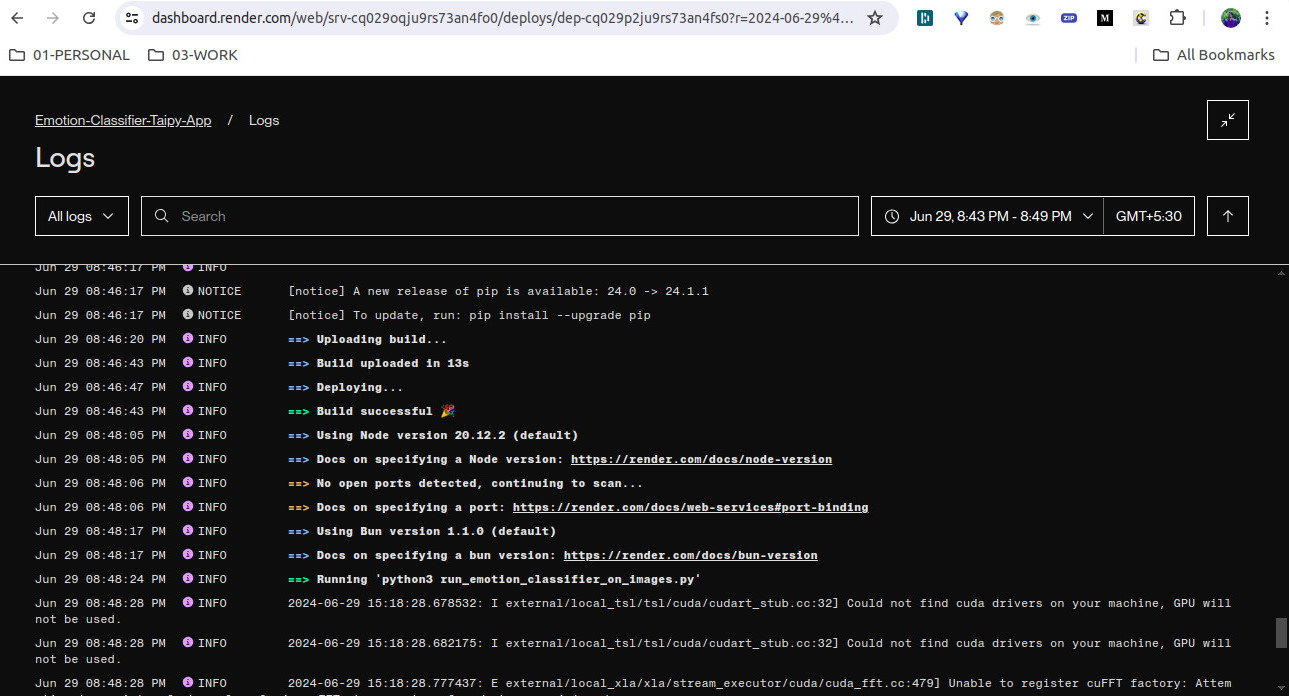

In [ ]:
# Failed Render Deployment

from IPython import display
display.Image("data/images/CV_Project_01_Emotion_Classifier_Keras-04-Render-Failed-Deployment-05.jpg")

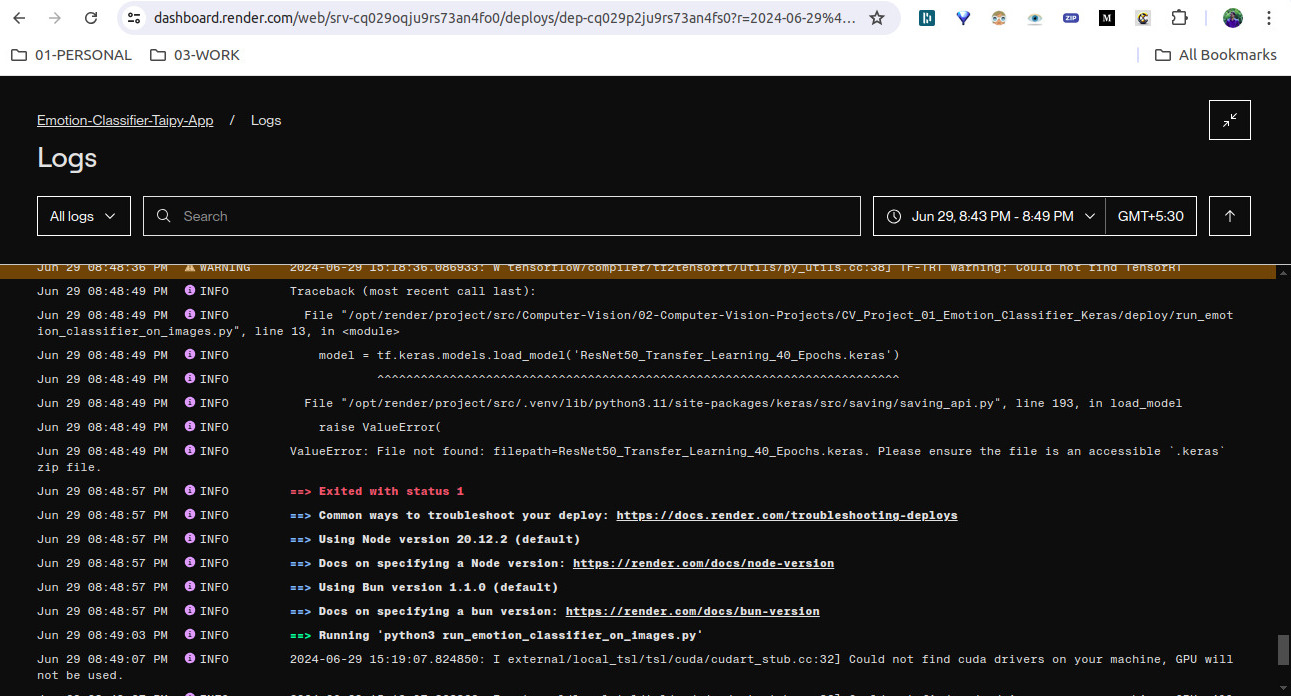

In [ ]:
# Failed Render Deployment

from IPython import display
display.Image("data/images/CV_Project_01_Emotion_Classifier_Keras-04-Render-Failed-Deployment-06.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Emotion Classifier Gradio App for Prediction on User Images

Since Taipy App on Render platform didn't work out as expected, we will deploy using Gradio. Here are some of the key advantages of Gradio for deploying machine learning models:

**Ease of Use:**

- **Low Code Requirement:** Gradio requires minimal coding compared to building a full-fledged web application. You can define the user interface and connect it to your model prediction function with just a few lines of code.
- **Intuitive Interface:** Gradio provides pre-built components for common input and output types (images, text, numbers, etc.), making it easy to create user-friendly interfaces without extensive web development knowledge.

**Rapid Prototyping and Iteration:**

- **Fast Development Cycle:** Gradio allows you to quickly create a functional web interface for your model, enabling rapid prototyping and testing of your ideas.
- **Iterative Refinement:** You can easily modify your prediction function or user interface code and see the changes reflected in the Gradio interface immediately. This facilitates iterative development and refinement of your model deployment.

**Flexibility:**

- **Supports Various Models:** Gradio integrates with a wide range of machine learning frameworks, including TensorFlow, PyTorch, Scikit-learn, and others. This allows you to deploy various types of models without framework-specific limitations.
- **Customization Options:** While Gradio offers pre-built components, it also allows for customization of the user interface with HTML, CSS, and JavaScript. This enables you to tailor the interface to your specific needs and branding.

Gradio integrates seamlessly with Jupyter Notebook, allowing you to directly deploy your machine learning models as interactive web applications within your notebook environment.

**Benefits of Using Gradio in Jupyter Notebook:**

- **Rapid Prototyping:** Experiment with different model configurations and user interfaces directly within your notebook.
- **Interactive Exploration:** Users can interact with your model by uploading data and seeing predictions in real-time.
- **Easy Sharing:** Share your notebook with collaborators, allowing them to interact with the model without setting up their environments.

In [ ]:
!pip3 install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 M

In [ ]:
# Imports
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import gradio as gr

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Load the best ResNet50 model
model_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/ResNet50_Transfer_Learning_40_Epochs.keras"
model = tf.keras.models.load_model(model_path)

In [ ]:
# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [ ]:
# Initialize the face classifier
face_classifier_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/haarcascade_frontalface_default.xml"
face_classifier = cv2.CascadeClassifier(face_classifier_path)

In [ ]:
# Function to predict emotion (function is expecting PIL image as input)
def predict_emotion(image):
    # Convert PIL image to OpenCV format (BGR)
    opencv_image = np.array(image)[:, :, ::-1].copy()  # Convert RGB to BGR

    faces = face_classifier.detectMultiScale(opencv_image, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)

    # Check for detected faces
    if len(faces) == 0:
        return "No faces detected"

    # Process the first face
    (x, y, w, h) = faces[0]
    face = opencv_image[y:y + h, x:x + w]
    face = cv2.resize(face, (224, 224))
    face = face.astype("float") / 255.0
    face = img_to_array(face)
    face = np.expand_dims(face, axis=0)

    prediction = model.predict(face)[0]
    emotion = emotion_labels[np.argmax(prediction)]

    return emotion

In [ ]:
# Define the Gradio interface
interface = gr.Interface(
    fn=predict_emotion,  # Your prediction function
    inputs=gr.Image(type="pil"),  # Input for uploading an image, directly compatible with PIL images
    outputs="text",  # Output as text displaying the predicted emotion
    title="Emotion Classifier",
    description="Upload an Image and Discover the Emotions Within"
)

In [ ]:
# Launch the Gradio interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d0db4d376913b3e95c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Deployment of the Emotion Classifier Gradio App on Hugging Face Spaces

## 1. Upload the large model to Hugging Face Spaces

Our Emotion Classifier model (ResNet50_Transfer_Learning_40_Epochs.keras) has a size of 303 MB. Uploading a large model (300+ MB) to Hugging Face Spaces can be challenging due to size limitations in repositories. However, Hugging Face supports uploading large files using their `HfApi` in the `huggingface_hub` library. Here's how you can handle this:

### Step 1: Create a Model Repository Using the Web Interface

1. **Log in to Your Hugging Face Account:**

    - Go to Hugging Face and log in to your account.

2. **Navigate to the "New Model" Page:**

    - Click on your profile picture in the top-right corner.
    - Select “New Model” from the dropdown menu.

3. **Create a New Model Repository:**

    - Fill out the form with the necessary information:
        - Owner: Choose your username.
        - Model name: Enter a name for your model repository.
        - License: Choose an appropriate license.
        - Private: Choose whether to make your repository public or private.
    - Click the “Create model” button.

4. **Your Model Repository is Now Created:**

    - You will be redirected to the new model repository page. Here you can see options to upload files, readme, and other metadata.

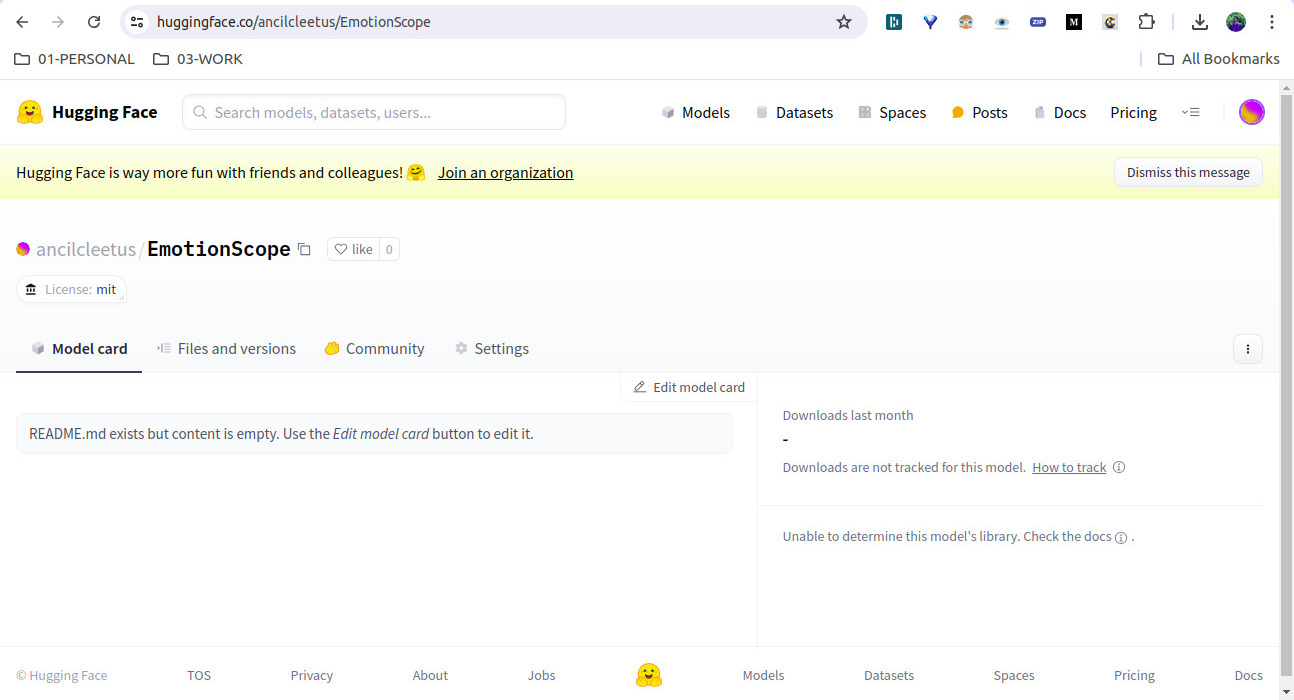

In [1]:
# Created Model repo in Hugging Face Spaces

from IPython import display
display.Image("data/images/CV_Project_01_EmotionScope-05-Hugging-Face-Spaces-Deployment-01.jpg")

### Step 2: Upload Your Model Using `HfApi`

#### 1. Install the Hugging Face Hub CLI

In [2]:
!pip3 install huggingface_hub

#### 2. Log in to Hugging Face

In [6]:
# Log in to your Hugging Face account using the CLI (https://huggingface.co/)
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


This command will prompt you to enter your **Hugging Face API token**. You can get this token from your Hugging Face account settings.

#### 3. Upload Your Model

In [7]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Path to the best ResNet50 model
model_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/ResNet50_Transfer_Learning_40_Epochs.keras"

In [12]:
from huggingface_hub import HfApi

# Initialize the API
api = HfApi()

# Upload the model file
api.upload_file(
    path_or_fileobj=model_path,
    path_in_repo="ResNet50_Transfer_Learning_40_Epochs.keras",
    repo_id="ancilcleetus/EmotionScope",
    repo_type="model"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ResNet50_Transfer_Learning_40_Epochs.keras:   0%|          | 0.00/303M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ancilcleetus/EmotionScope/commit/91f7f83a0e0037689ac53f09ee33d3f531a21572', commit_message='Upload ResNet50_Transfer_Learning_40_Epochs.keras with huggingface_hub', commit_description='', oid='91f7f83a0e0037689ac53f09ee33d3f531a21572', pr_url=None, pr_revision=None, pr_num=None)

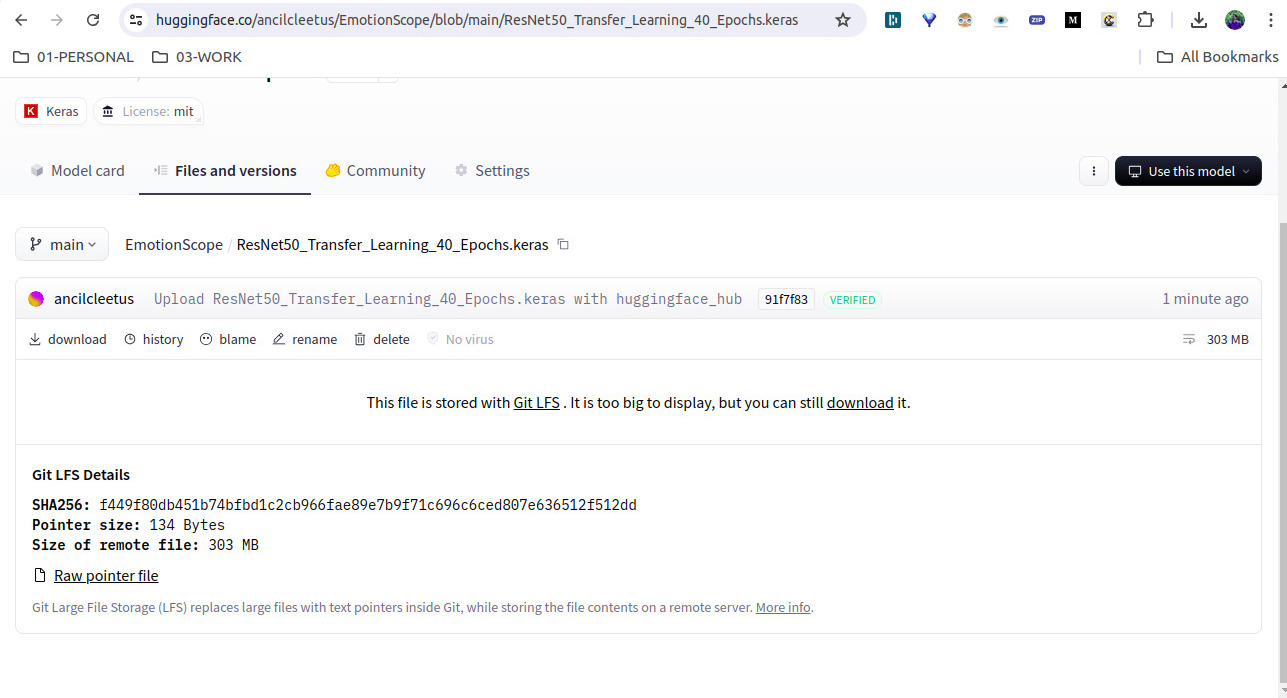

In [13]:
# Uploaded Emotion Classifier Model in Hugging Face Spaces

from IPython import display
display.Image("data/images/CV_Project_01_EmotionScope-05-Hugging-Face-Spaces-Deployment-02.jpg")

## 2. Update Your Application to Download the Model from Hugging Face Spaces and Do Predictions

In [14]:
!pip3 install tensorflow keras numpy matplotlib opencv-python

In [15]:
!pip3 install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 107.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.8 M

In [16]:
# Imports
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from huggingface_hub import hf_hub_download
import gradio as gr

In [17]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [19]:
import os

# Download the best ResNet50 model if not already present
if not os.path.exists("ResNet50_Transfer_Learning_40_Epochs.keras"):
    hf_hub_download(
        repo_id="ancilcleetus/EmotionScope",
        filename="ResNet50_Transfer_Learning_40_Epochs.keras",
        local_dir=".",
    )

model_path = "./ResNet50_Transfer_Learning_40_Epochs.keras"
model = tf.keras.models.load_model(model_path)

(…)sNet50_Transfer_Learning_40_Epochs.keras:   0%|          | 0.00/303M [00:00<?, ?B/s]

In [20]:
# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [28]:
# Initialize the face classifier
face_classifier_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/haarcascade_frontalface_default.xml"
face_classifier = cv2.CascadeClassifier(face_classifier_path)

In [29]:
# Function to test Emotion Classifier on local images before deployment using Gradio GUI
def predict_emotion_from_path(image_path):
    """
    Predicts the emotion given the path to an image.

    Args:
        image_path (str): The path to the image file.

    Returns:
        List of tuples: Each tuple contains the coordinates of the face (x, y, w, h) and the predicted emotion.
    """
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")

    # Detect faces in the image
    faces = face_classifier.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
    emotions = []
    for (x, y, w, h) in faces:
        face = image[y:y + h, x:x + w]
        face = cv2.resize(face, (224, 224))
        face = face.astype("float") / 255.0
        face = img_to_array(face)
        face = np.expand_dims(face, axis=0)

        prediction = model.predict(face)[0]
        emotion = emotion_labels[np.argmax(prediction)]
        emotions.append((x, y, w, h, emotion))
    return emotions, image

In [30]:
import matplotlib.pyplot as plt

def display_image_with_emotions(image_path):
    emotions, image = predict_emotion_from_path(image_path)

    for (x, y, w, h, emotion) in emotions:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

1/1 [==============================] - 4s 4s/step


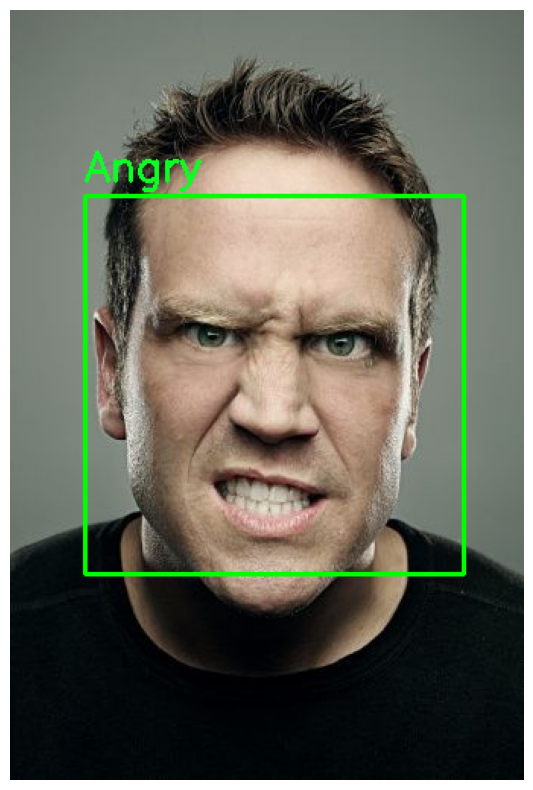

In [31]:
# Test "Angry" expression image
angry_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/angry.jpg"
display_image_with_emotions(angry_image_path)

1/1 [==============================] - 0s 25ms/step


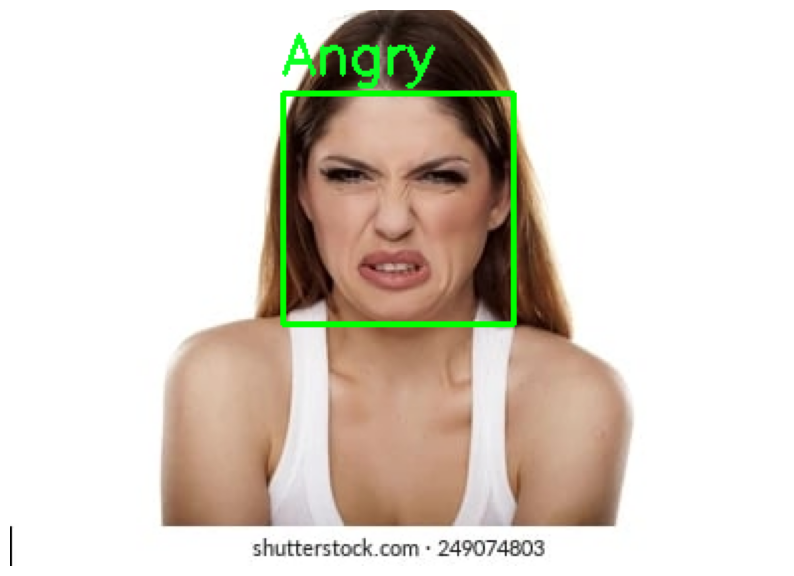

In [32]:
# Test "Disgust" expression image
disgust_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/disgust.jpg"
display_image_with_emotions(disgust_image_path)

1/1 [==============================] - 0s 23ms/step


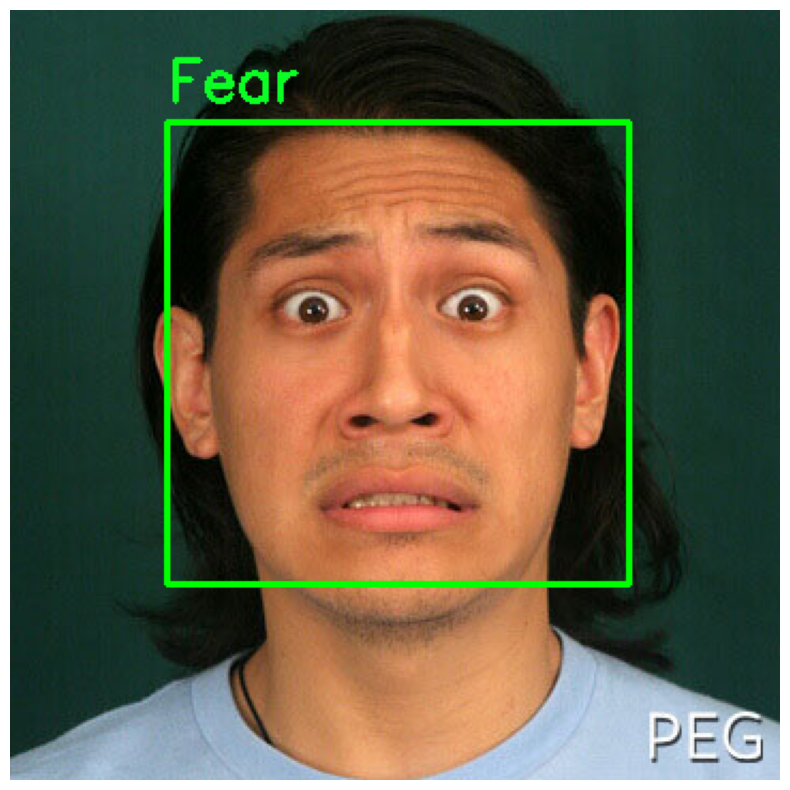

In [33]:
# Test "Fear" expression image
fear_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/fear.jpg"
display_image_with_emotions(fear_image_path)

1/1 [==============================] - 0s 23ms/step


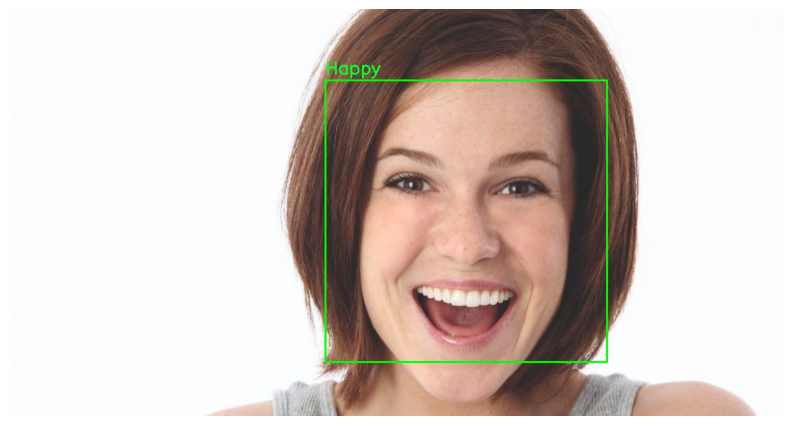

In [34]:
# Test "Happy" expression image
happy_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/happy.jpg"
display_image_with_emotions(happy_image_path)

1/1 [==============================] - 0s 23ms/step


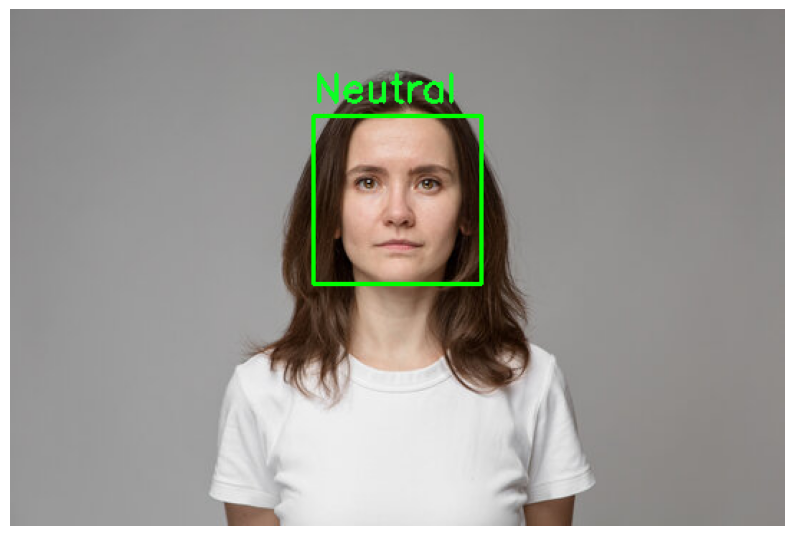

In [35]:
# Test "Neutral" expression image
neutral_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/neutral.jpg"
display_image_with_emotions(neutral_image_path)

1/1 [==============================] - 0s 22ms/step


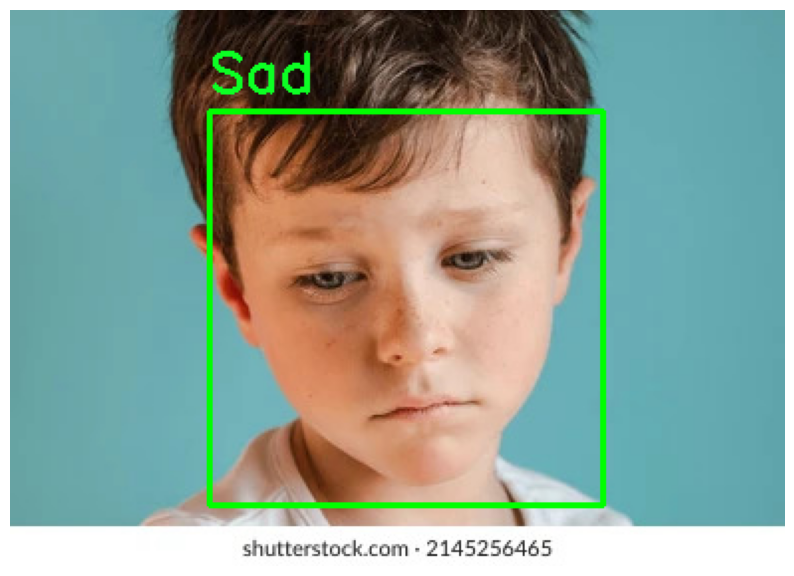

In [36]:
# Test "Sad" expression image
sad_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/sad.jpg"
display_image_with_emotions(sad_image_path)

1/1 [==============================] - 0s 35ms/step


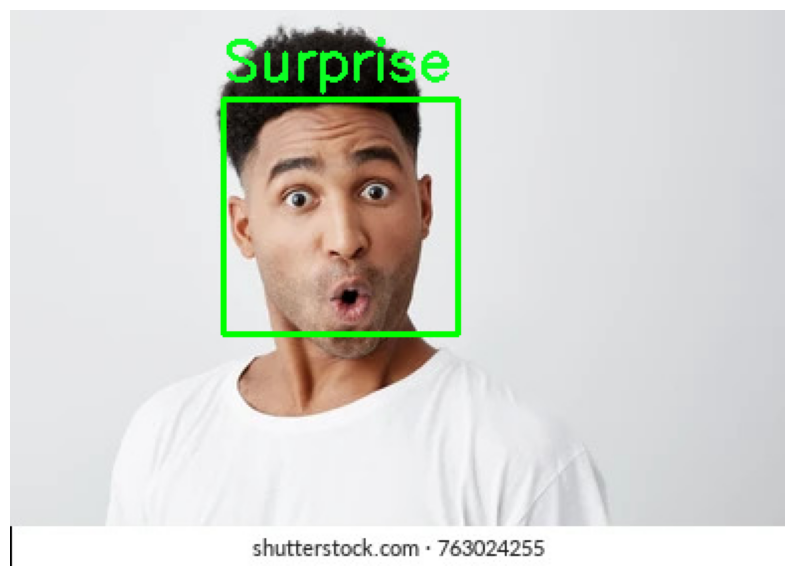

In [37]:
# Test "Surprise" expression image
surprise_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_EmotionScope/surprise.jpg"
display_image_with_emotions(surprise_image_path)

In [38]:
# Function to predict emotion (to be used in actual Gradio App, function is expecting PIL image as input)
def predict_emotion(image):
    # Convert PIL image to OpenCV format (BGR)
    opencv_image = np.array(image)[:, :, ::-1].copy()  # Convert RGB to BGR

    faces = face_classifier.detectMultiScale(opencv_image, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)

    # Check for detected faces
    if len(faces) == 0:
        return "No faces detected"

    # Process the first face
    (x, y, w, h) = faces[0]
    face = opencv_image[y:y + h, x:x + w]
    face = cv2.resize(face, (224, 224))
    face = face.astype("float") / 255.0
    face = img_to_array(face)
    face = np.expand_dims(face, axis=0)

    prediction = model.predict(face)[0]
    emotion = emotion_labels[np.argmax(prediction)]

    return emotion

In [39]:
# Define the Gradio interface
interface = gr.Interface(
    fn=predict_emotion,  # Your prediction function
    inputs=gr.Image(type="pil"),  # Input for uploading an image, directly compatible with PIL images
    outputs="text",  # Output as text displaying the predicted emotion
    title="EmotionScope",
    description="Upload Your Photo, Unveil Your Emotion!"
)

In [40]:
# Launch the Gradio interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d24e6e49c1c5826943.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## 3. Deployment of the finished app in Hugging Face Spaces

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 6. Deployment for Real-time Prediction on Webcam Video

We want to run Emotion Classifier on a video and save output with predictions for each frame.

In [ ]:
# Imports
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Upload best ResNet50 model
model_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/ResNet50_Transfer_Learning_40_Epochs.keras"
model = tf.keras.models.load_model(model_path)

In [ ]:
# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [ ]:
# Initialize the face classifier
face_classifier_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/haarcascade_frontalface_default.xml"
face_classifier = cv2.CascadeClassifier(face_classifier_path)

In [ ]:
def predict_emotions(video_path, output_path):
  """
  Analyzes a video, predicts emotions for each frame, and saves the output video with annotations.

  Args:
    video_path: The path to the video file.
    output_path: The path to save the output video with annotations.
  """
  # Start capturing video from the provided path
  cap = cv2.VideoCapture(video_path)

  # Get video properties for output video creation
  fps = cap.get(cv2.CAP_PROP_FPS)
  width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

  # Define video writer for output
  fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust codec if needed (e.g., 'XVID' for avi output)
  out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

  # Continuous loop for processing video frames
  while True:
    ret, frame = cap.read()
    if not ret:
      break

    # Detect faces in the frame
    faces = face_classifier.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
    # Process each face detected
    for (x, y, w, h) in faces:
      # Draw a rectangle around each detected face
      cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
      # Extract the region of interest (ROI) i.e. the face area from the frame
      face = frame[y:y + h, x:x + w]
      # Resize the ROI to the size expected by the model (224x224 pixels in this case)
      face = cv2.resize(face, (224, 224))
      face = face.astype("float") / 255.0  # Normalize pixel values
      face = img_to_array(face)
      face = np.expand_dims(face, axis=0)  # Add batch dimension

      prediction = model.predict(face)[0]
      emotion = emotion_labels[np.argmax(prediction)]
      label_position = (x, y - 10)

      cv2.putText(frame, emotion, label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Write the annotated frame to the output video
    out.write(frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

  # Release resources
  cap.release()
  out.release()
  cv2.destroyAllWindows()

In [ ]:
# Prediction on video
video_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/Ancil_Cleetus_Emotions_01.mp4"  # video_path = 0 for Webcam video
output_path = "Ancil_Cleetus_Classified_Emotions.mp4"  # Adjust extension based on codec
predict_emotions(video_path, output_path)

1/1 [==============================] - 0s 22ms/step


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 7. Model Retraining

## 1. Need for Model Retraining

Imagine you train a deep learning model to recognize different types of dogs in pictures. It sees thousands of images of poodles, bulldogs, chihuahuas, and so on, and learns to tell them apart. That's great! But what happens if, a year later, a new breed of dog becomes super popular?

Here's where model retraining comes in. It's like teaching your model new tricks. You feed it fresh data with pictures of this new dog breed, and the model adjusts itself to recognize them as well.

Here's why retraining is important for deep learning models:
- **The world changes**: Trends, fashions, even the way people speak can evolve. If your model's data is outdated, it won't understand these changes and its predictions might become inaccurate.
- **New data, new knowledge**: Just like us, deep learning models learn best with more information. Retraining with fresh data keeps your model up-to-date and improves its overall accuracy.

Here's a simple analogy: Imagine a child learning about animals for the first time. They see a dog and a cat, and they learn the difference. But if they only ever see those two animals, they might get confused when they encounter a horse for the first time. By showing them more animals, they can expand their knowledge and become better at identifying different creatures.

Retraining a deep learning model is similar. It's about giving it more information so it can stay relevant and make the best possible predictions.

## 2. When to do Model Retraining ?

There are two main approaches to decide when to retrain a deep learning model:
1. **Scheduled Retraining**:
    - This is like setting a regular checkup for your model. You retrain it at a predefined time interval, like every month or quarter.
    - This is useful when you expect the underlying data to change steadily over time, like customer buying habits or social media trends.
    - **Benefit**: Simple to implement and ensures your model is updated regularly.
    - **Drawback**: Retraining too often can be computationally expensive and unnecessary if the data isn't changing significantly.
2. **Trigger-Based Retraining**:
    - This is more like going to the doctor when you feel sick. You monitor the model's performance and trigger a retrain when it falls below a certain threshold.
    - Performance metrics can be accuracy, error rate, or any measure specific to your task.
    - This is useful when data changes can be unpredictable, or when the cost of retraining is high.
    - **Benefit**: More efficient use of resources, retraining only when truly needed.
    - **Drawback**: Requires setting up monitoring systems and defining clear thresholds for triggering retraining.

Here are some additional factors to consider:
- **Data Drift**: This refers to a change in the underlying data distribution that the model was trained on. For example, if your model is trained on images with good lighting and then encounters many dark photos, its performance might suffer. Data drift can trigger retraining.
- **Concept Drift**: This is a more fundamental change, where the very meaning of what the model is predicting has shifted. For instance, a model trained for spam emails might need retraining if spam tactics evolve significantly.

Ultimately, the best time to retrain your deep learning model depends on your specific application and the trade-off between keeping the model up-to-date and the cost of retraining. It's often a good idea to experiment with both scheduled and trigger-based retraining to find the optimal approach for your needs.

## 3. How to do Model Retraining ?

Retraining a deep learning model involves several steps, but here's a simplified breakdown:
1. **Gather New Data**: This is the fresh information you'll use to update your model. The data should be relevant to your task and address any potential data drift or concept drift. Ensure the new data is high-quality and properly formatted for your model.

2. **Prepare the Data**: Depending on your framework and setup, you might need to pre-process the new data. This could involve cleaning, normalization, or any other transformations you applied to the original training data.

3. **Load the Model**: Use your deep learning framework (TensorFlow, PyTorch, etc.) to load the previously trained model. This serves as the starting point for retraining.

4. **Define the Retraining Process**: Here, you specify how much of the original model to keep and how much to update with the new data. There are different approaches, but a common technique is to freeze the initial layers (which contain more general features) and retrain the later layers (which handle more specific details) on the new data.

5. **Retrain the Model**:  This involves feeding the new data to the model and adjusting its internal parameters to improve its performance on the updated task. You'll likely use the same optimization algorithms you used for initial training.

6. **Evaluate the Retrained Model**:  Don't just assume retraining worked!  Test the retrained model on a separate dataset to see if its performance has improved on the task you care about. You might need to adjust the retraining process or data selection if the results aren't satisfactory.

7. **Deployment**: Once you're happy with the retrained model's performance, you can deploy it back into production to make predictions on new data.

## 4. A/B Testing

A/B Testing is a controlled experiment where you compare two or more versions of something (like a website layout or a machine learning model) to see which one performs better. In the context of machine learning, you might compare a new, retrained model against the currently deployed model.

Once you've retrained your model, you can use A/B testing to compare its performance against the original model in a real-world setting. This allows you to validate the effectiveness of the retraining process before fully deploying the new model.

Consider a scenario where our deployed model serves 100,000 users. We've retrained a new model and want to rigorously validate its effectiveness before fully integrating it.

A/B testing provides a robust approach. We'll initially expose the retrained model to a controlled group of 10,000 users, while the remaining 90,000 users continue using the deployed model. Positive feedback from the initial group will prompt a measured rollout, gradually increasing the user base exposed to the retrained model (20,000, then 30,000, and so on) until all 100,000 users are transitioned.

However, if negative feedback arises at any stage, we'll strategically revert to the deployed model. This triggers a reevaluation of the retraining process, ensuring the next iteration addresses the identified shortcomings. Only once all users are satisfied with the retrained model's performance will we fully replace the deployed model.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)